## Big Mart Sales Prediction 
## Meka Sai Krithik IIT-R 20311015 

## Importing Libraries

In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## Data Set

In [2]:
test=pd.read_csv("Test_u94Q5KV.csv")
train=pd.read_csv("Train_UWu5bXk.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### Item_Identifier, Outlet_Identifier Not Essential for Learning So Drop These Columns

In [6]:
train.drop("Item_Identifier",axis=1,inplace=True)
train.drop("Outlet_Identifier",axis=1,inplace=True)

##### Missing Values Handling

In [7]:
train.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
l=train.columns

##### For train[i].dtypes!='O' --> Represents Numerical Values we will Handle Them by filling Missing Values with median of column and for categorical we will Handle them by filling with Mode of Unique Values. Using value_counts

In [9]:
import numpy as np
for i in l:
    if  train[i].dtypes!='O':
        med=train[i].median()
        train[i].fillna(med,inplace=True)
    else:
        m=train[i].value_counts().index[0]
        train[i].fillna(m,inplace=True)  

##### Splitting Nums and Categoricals to x, y respectively

In [10]:
x=train.select_dtypes(include=[np.number]) 
y=train.select_dtypes(exclude=[np.number])

In [11]:
y.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [12]:
for t in y.columns:
    print(t+":")
    print(y[t].value_counts())
    print("-"*80)

Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
--------------------------------------------------------------------------------
Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
--------------------------------------------------------------------------------
Outlet_Size:
Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64
--------------------------------------------------------------------------

In [13]:
print(x.isna().sum())

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64


In [14]:
print(y.isna().sum())

Item_Fat_Content        0
Item_Type               0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64


train.isna().sum()

<Axes: >

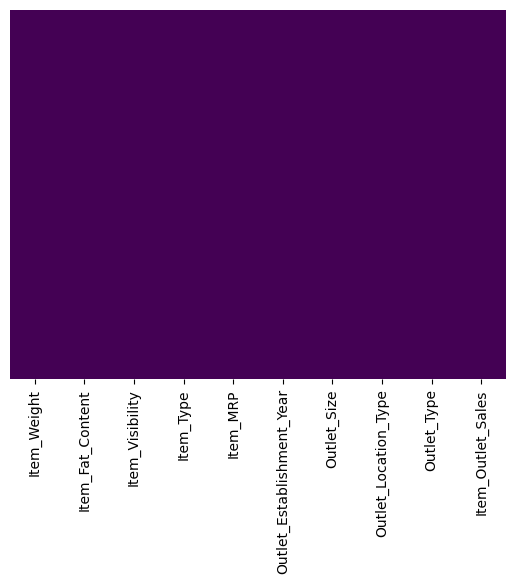

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

## EDA

Item_Weight:


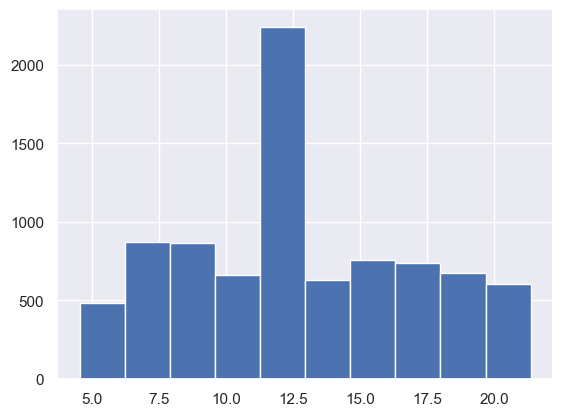

Item_Visibility:


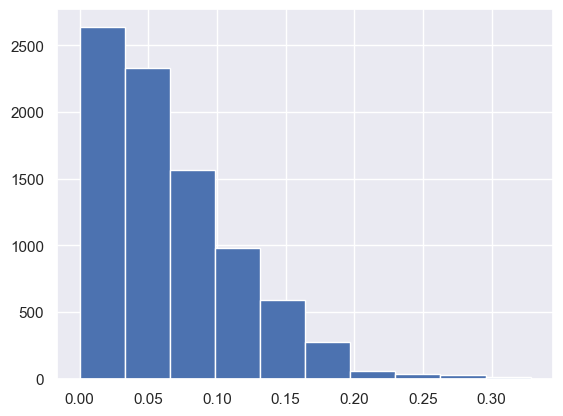

Item_MRP:


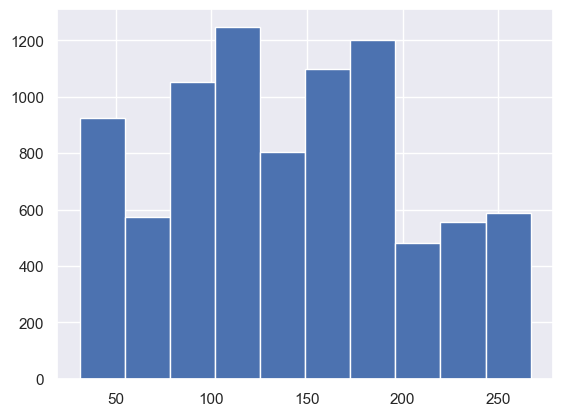

Outlet_Establishment_Year:


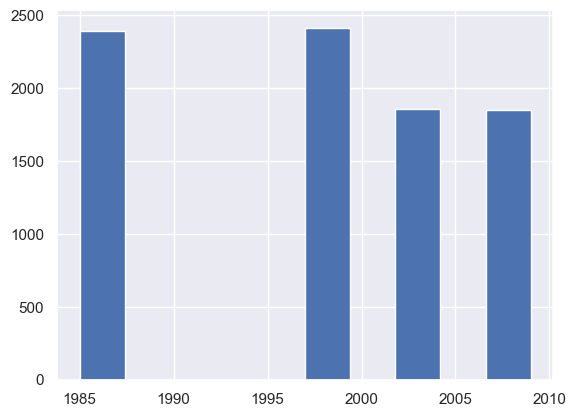

Item_Outlet_Sales:


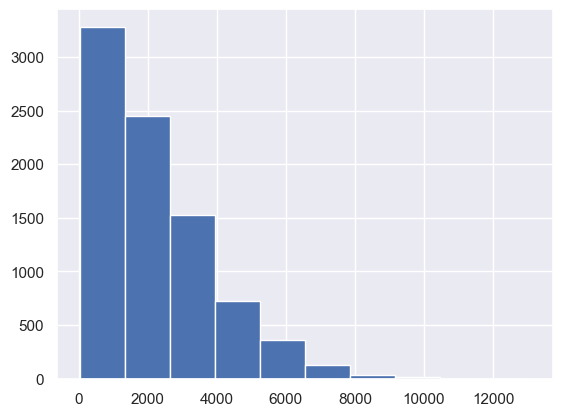

In [16]:
for t in x:
    print(t+":")
    sns.set(style="darkgrid")
    plt.figure()
    x[t].hist()
    plt.show()

In [17]:
x.columns.size

5

In [18]:
columns = x.columns


In [19]:
columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

##### Corelation Matrix

<Axes: >

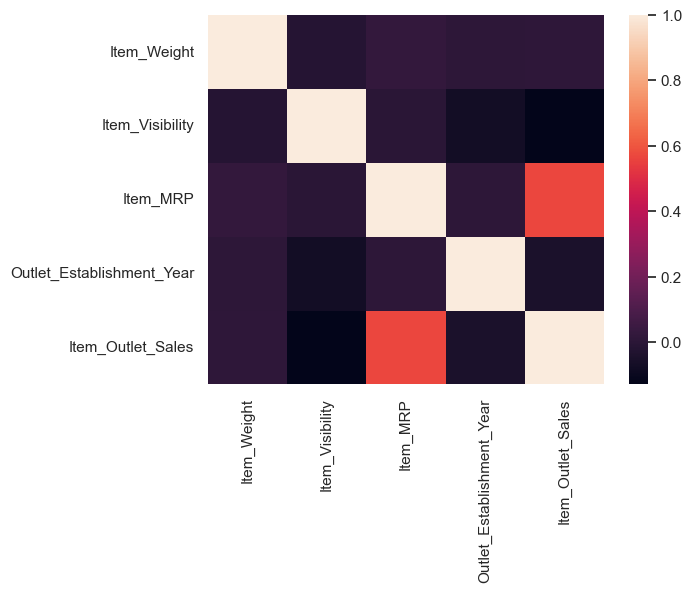

In [20]:
sns.heatmap(x.corr())

In [21]:
x.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


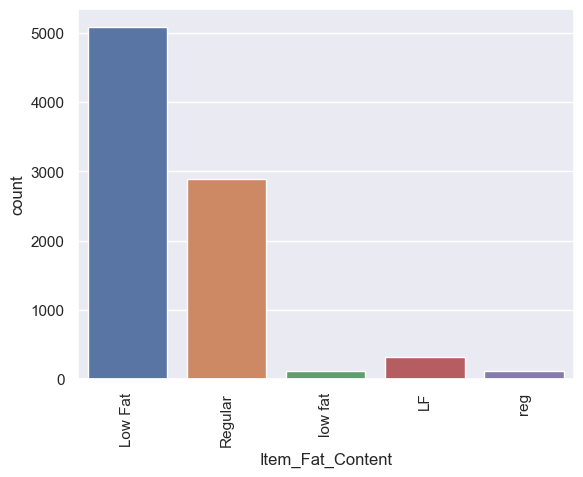

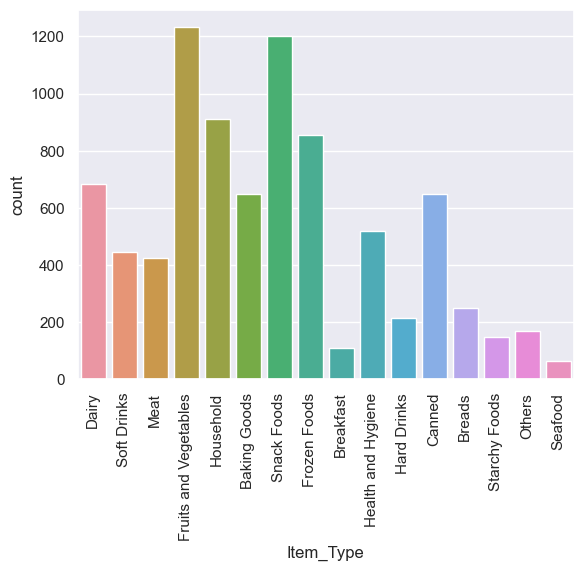

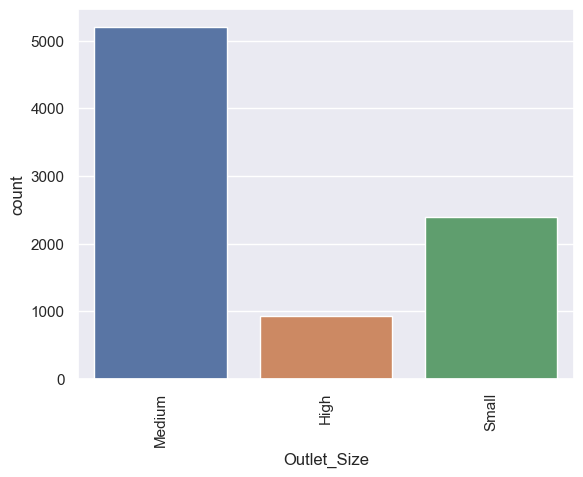

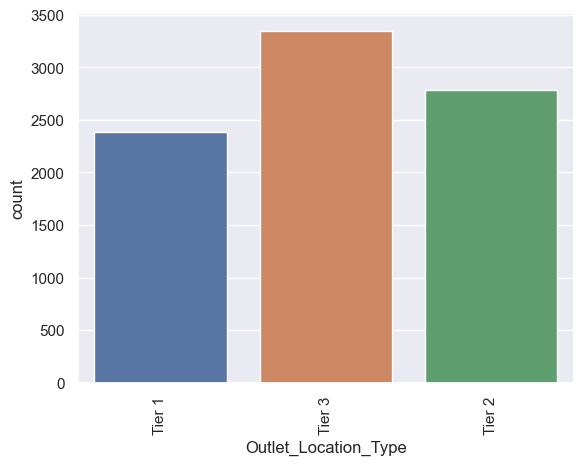

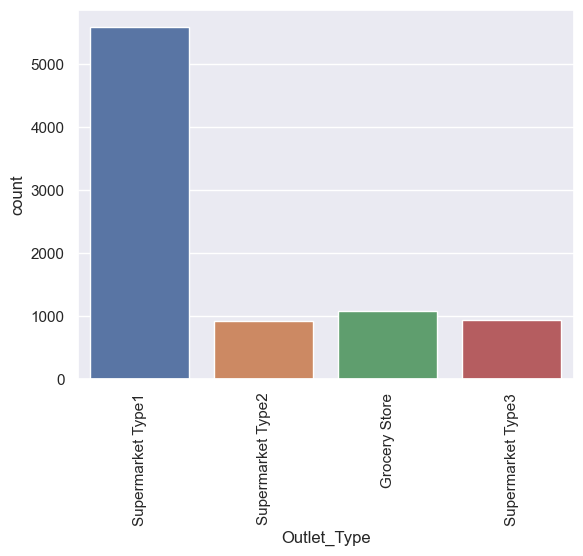

In [22]:
for i in y.columns:
      sns.set(style="darkgrid")
      plt.figure()
    
      chart=sns.countplot(x=i,data= y)
      chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [23]:
y.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [24]:
pd.pivot_table(train,index="Item_Fat_Content",values="Item_Outlet_Sales").sort_values("Item_Outlet_Sales",ascending=False)

,Item_Outlet_Sales
Item_Fat_Content,
Regular,2235.186702
Low Fat,2164.477336
low fat,2087.740737
LF,2073.551928
reg,1962.192268


In [25]:
pd.pivot_table(train,index='Item_Type',values="Item_Outlet_Sales").sort_values("Item_Outlet_Sales",ascending=False)

,Item_Outlet_Sales
Item_Type,
Starchy Foods,2374.332773
Seafood,2326.065928
Fruits and Vegetables,2289.009592
Snack Foods,2277.321739
Household,2258.784300
Dairy,2232.542597
Canned,2225.194904
Breads,2204.132226
Meat,2158.977911


In [26]:
pd.pivot_table(train,index='Outlet_Size',values="Item_Outlet_Sales").sort_values("Item_Outlet_Sales",ascending=False)

,Item_Outlet_Sales
Outlet_Size,
High,2298.995256
Medium,2283.730470
Small,1912.149161


In [27]:
pd.pivot_table(train,index='Outlet_Location_Type',values="Item_Outlet_Sales").sort_values("Item_Outlet_Sales",ascending=False)

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 2,2323.990559
Tier 3,2279.627651
Tier 1,1876.909159


In [28]:
pd.pivot_table(train,index='Outlet_Type',values="Item_Outlet_Sales").sort_values("Item_Outlet_Sales",ascending=False)

,Item_Outlet_Sales
Outlet_Type,
Supermarket Type3,3694.038558
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Grocery Store,339.828500


In [29]:
pd.pivot_table(train,index='Item_Type',values="Item_Weight").sort_values("Item_Weight",ascending=False)

,Item_Weight
Item_Type,
Others,13.615976
Starchy Foods,13.558074
Dairy,13.285565
Household,13.254522
Fruits and Vegetables,13.116753
Health and Hygiene,13.048452
Snack Foods,12.919354
Frozen Foods,12.824007
Meat,12.772341


## Feature Engineering

<Axes: >

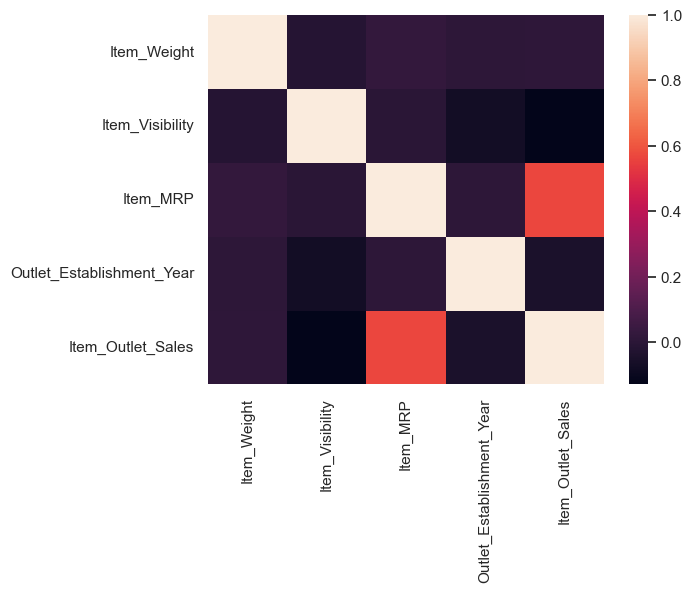

In [30]:
sns.heatmap(x.corr())

In [31]:
train["mrp per weight"]=train["Item_MRP"]/train["Item_Weight"]
train["visibility per mrp"]=train["Item_Visibility"]/train["Item_MRP"]
train["mrp per year"]=train["Item_MRP"]/train["Outlet_Establishment_Year"]

In [32]:
train.drop("Item_Weight",axis=1,inplace=True)
train.drop("Outlet_Establishment_Year",axis=1,inplace=True)
train.drop("Item_Visibility",axis=1,inplace=True)

In [33]:
t=train.select_dtypes(include=[np.number]) 
q=train.select_dtypes(exclude=[np.number])

In [34]:
x.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [35]:
y.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [36]:
t.head()

,Item_MRP,Item_Outlet_Sales,mrp per weight,visibility per mrp,mrp per year
0,249.8092,3735.1380,26.861204,0.000064,0.124967
1,48.2692,443.4228,8.153581,0.000399,0.024026
2,141.6180,2097.2700,8.092457,0.000118,0.070844
3,182.0950,732.3800,9.484115,0.000000,0.091139
4,53.8614,994.7052,6.031512,0.000000,0.027107


In [37]:
labels=t["Item_Outlet_Sales"].values
t.drop(["Item_Outlet_Sales"],axis=1,inplace=True)

In [38]:
t.head()

,Item_MRP,mrp per weight,visibility per mrp,mrp per year
0,249.8092,26.861204,0.000064,0.124967
1,48.2692,8.153581,0.000399,0.024026
2,141.6180,8.092457,0.000118,0.070844
3,182.0950,9.484115,0.000000,0.091139
4,53.8614,6.031512,0.000000,0.027107


## One Hot Encoding

In [39]:
q=pd.get_dummies(q)

In [40]:
q.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,False,True,False,False,False,False,False,False,False,True,...,False,True,False,True,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False


## Standard Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
def scaling(x,y):
     f_s=scaler.fit_transform(x.values)
     q_s=y.values
     vk=np.concatenate((f_s,q_s),axis=1)
     return vk

##### Combining Scaled Nums and Categorics into a Data Set

In [42]:
features=scaling(t,q)

## Train, Test Split

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy
numpy.random.seed(1234)
(x_train,x_test,y_train,y_test) = train_test_split(features,labels, train_size=0.75, random_state=42)

##### For Regression Best Metric is RMSE

## Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
pred=lin_reg.predict(x_test)

##### RMSE

In [45]:
from sklearn.metrics import mean_squared_error
lin_mse=mean_squared_error(y_test,pred)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

1094.5367267027143

## Decision Trees

In [46]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)
pred=tree_reg.predict(x_test)

##### RMSE

In [47]:
lin_mse=mean_squared_error(y_test,pred)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

1487.241309254441

## Random Forest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
forest_reg.fit(x_train,y_train)
pred=forest_reg.predict(x_test)

##### RMSE

In [49]:
lin_mse=mean_squared_error(y_test,pred)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

1045.1669378585284

##### Cross Validation using CV = 10 for LinearRegression

In [50]:
scores=cross_val_score(lin_reg,x_train,y_train,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores

NameError: name 'cross_val_score' is not defined

In [ ]:
rmse_scores.mean()

1144.8338949125462

##### Cross Validation using CV = 10 for Decison Trees

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,features,labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores


array([1498.47463679, 1558.45246875, 1539.33352025, 1527.11584691,
       1495.31158529, 1506.71129354, 1498.02275023, 1586.46379918,
       1419.51160093, 1551.23318585])

In [ ]:
rmse_scores.mean()

1518.0630687711378

##### Cross Validation using CV = 10 for Random Forest Regression

In [ ]:
scores=cross_val_score(forest_reg,x_train,y_train,scoring="neg_mean_squared_error",cv=10)
scores

array([-1192442.11076076, -1112089.36222007, -1201615.87794034,
       -1230055.13849235, -1124860.81048595, -1386046.06837753,
       -1052261.20779763, -1240019.08784068, -1224890.45801486,
       -1379941.34695934])

In [ ]:
rmse_scores=np.sqrt(-scores) # - scores should be used because square root accepts only +ve values
rmse_scores

array([1091.98997741, 1054.55647654, 1096.18241089, 1109.07850871,
       1060.59455518, 1177.30457757, 1025.79783963, 1113.56144323,
       1106.74769393, 1174.70904779])

In [ ]:
rmse_scores.mean ()

1101.0522530891299

##### Best Performing at Any Point is Random Forest Regression so now Lets Find Best
## Hyper Parameters using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg=RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

##### Let's Use Best HyperParameters

In [ ]:
final_model = grid_search.best_estimator_
final_prediction=final_model.predict(x_test)

In [ ]:
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse) 
final_rmse

1113.4664093821477

## Let's Pre Process the actual Test Set

In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
import numpy as np
def miss(a):
    l=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type']
    for i in l:
        if a[i].dtypes!='O':
            med=a[i].median()
            a[i].fillna(med,inplace=True)
        else:
            m=a[i].value_counts().index[0]
            a[i].fillna(m,inplace=True)   

In [ ]:
miss(test)

In [ ]:
test.drop("Item_Identifier",axis=1,inplace=True)
test.drop("Outlet_Identifier",axis=1,inplace=True)

In [ ]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.500,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test["mrp per weight"]=test["Item_MRP"]/test["Item_Weight"]
test["visibility per mrp"]=test["Item_Visibility"]/test["Item_MRP"]
test["mrp per year"]=test["Item_MRP"]/test["Outlet_Establishment_Year"]

In [ ]:
test.drop("Item_Weight",axis=1,inplace=True)
test.drop("Outlet_Establishment_Year",axis=1,inplace=True)
test.drop("Item_Visibility",axis=1,inplace=True)

In [ ]:
train.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,mrp per weight,visibility per mrp,mrp per year
0,Low Fat,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,0.000064,0.124967
1,Regular,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,0.000399,0.024026
2,Low Fat,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,0.000118,0.070844
3,Regular,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,9.484115,0.000000,0.091139
4,Low Fat,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,6.031512,0.000000,0.027107


In [ ]:
test.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,mrp per weight,visibility per mrp,mrp per year
0,Low Fat,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,5.198178,0.000070,0.053958
1,reg,Dairy,87.3198,Medium,Tier 2,Supermarket Type1,10.520458,0.000440,0.043508
2,Low Fat,Others,241.7538,Medium,Tier 3,Grocery Store,16.558479,0.000412,0.120998
3,Low Fat,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1,21.193985,0.000099,0.077247
4,Regular,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,18.738400,0.000506,0.118000


In [ ]:
labels

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [ ]:
t=test.select_dtypes(include=[np.number]) 
q=test.select_dtypes(exclude=[np.number])

## One Hot Encoding

In [ ]:
q=pd.get_dummies(q)

## Scaling Test DataSet

In [ ]:
feat=scaling(t,q)

## Best Model Used for Prediction

In [ ]:
ped=grid_search.best_estimator_.predict(feat)
ped

array([1838.47354   , 1333.79714   ,  447.32882667, ..., 2065.11186   ,
       4325.0368    , 1681.72202667])

##### Add Prediction Column to TEST DataSet and assign test DataFrame to Finals 

In [ ]:
test['Predictions'] = ped
Finals = test

In [ ]:
Finals

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,mrp per weight,visibility per mrp,mrp per year,Predictions
0,Low Fat,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,5.198178,0.000070,0.053958,1838.473540
1,reg,Dairy,87.3198,Medium,Tier 2,Supermarket Type1,10.520458,0.000440,0.043508,1333.797140
2,Low Fat,Others,241.7538,Medium,Tier 3,Grocery Store,16.558479,0.000412,0.120998,447.328827
3,Low Fat,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1,21.193985,0.000099,0.077247,1750.987420
4,Regular,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,18.738400,0.000506,0.118000,6026.067027
...,...,...,...,...,...,...,...,...,...,...
5676,Regular,Snack Foods,141.3154,Small,Tier 1,Supermarket Type1,13.458610,0.000096,0.070764,1742.132280
5677,Regular,Starchy Foods,169.1448,Medium,Tier 3,Supermarket Type2,22.255895,0.000845,0.084194,2329.922713
5678,Low Fat,Health and Hygiene,118.7440,Medium,Tier 2,Supermarket Type1,11.874400,0.000619,0.059313,2065.111860
5679,Regular,Canned,214.6218,Medium,Tier 2,Supermarket Type1,14.027569,0.000000,0.106937,4325.036800


## Export Predictions CSV and Finals CSV

In [ ]:
Exp1 = Finals['Predictions'].to_csv('Predictions.csv', index = True)
Exp2 = Finals.to_csv('testDataSetPreds.csv', index = True)

## REPORT

###### Downloaded Data from https://www.kaggle.com/aakash2016/big-mart-sales-dataset/download. worked on Data using VS Code IDE and Jupyter Notebook.
###### > Imported Required Libraries and Loaded the Data Set both Train and Test DataSet.
###### > Preprocessed Train Data - Handled missing num vals using median and handle missing categoricals using mode (or most repeated value).
###### > Dropped this column Item_Outlet_Sales from Train DataSet and Labeled it as Labels to use it as y for training and testing purpose and remaining columns as x.
###### > Splitted the Train Data into Num and Cat Vals and using correlation Matrix did Feature Engineering for Num Data of Train Set.
###### > One Hot Encoding of Categorical Values using getdummies function.
###### > Normalized or Scaled the Data using Standard Scaling Technique with help of StandardScaler.
###### > Concated the Data into Train Data Set and Splitted the Train Data into Train and Test Data with ratio 3:1 (or Train Size = 0.75).

###### > Predicted using Linear Regression, Decision Trees, and Random Forest Evaluated using RMSE Performace Metric and Cross Validation of RMSE using CV = 10.
###### > Random Forest Out-Performed other 2 in both performance metrics so For Tuning HyperParameters used GridSearchCV to find best HyperParameters for the DataSet.
###### > Imported the Model with Best HyperParameters to predict for Test DataSet.

###### > Preprocessed Test Data - Handled missing num vals using median and handle missing categoricals using mode (or most repeated value).
###### > Splitted the Test Data into Num and Cat Vals and using correlation Matrix did Feature Engineering for Num Data of Test Set.
###### > One Hot Encoding of Categorical Values using getdummies function.
###### > Normalized or Scaled the Data using Standard Scaling Technique with help of StandardScaler.
###### > Concated the Data into Test Data Set.
###### > The Obtained Test DataSet is now used for prediction on Best Model Obatined i.e., RandomForest Regressor with HyperParameter Tuning.
###### > Obtained Predictions and Test Set Merged with Predictions -- Exported to CSv.